Estrutura de Dados - Listas e deques
==========================================

Capítulo 10 do livro texto sugerido:
Introduction to Algorithms, Fourth Edition
By Thomas H. Cormen, Charles E. Leiserson, Ronald L. Rivest and Clifford Stein
https://mitpress.mit.edu/9780262046305/introduction-to-algorithms/

Conteúdo
========

## Listas
Como mostrado na Seção de introdução, listas são implementadas de maneira bastante semelhante com pilhas e filas.

São compostas por elementos de lista contendo um valor e um referência para o elemento a sua frente, enquanto a fila contém a referência para o primeiro elemento.

Diferente da pilha e fila porém, a posição de inserção e remoção dos dados não é pré-determinada, aumentando a complexidade da gerência dos dados nesta estrutura.

A implementação de uma lista é mostrada abaixo

In [149]:
class ElementoLista():
    def __init__(self, valorInicial):
        # Cria um elemento de lista
        # contendo o valor enfileirado
        self.valor = valorInicial
        # e a referência para o elemento seginte a ele na lista
        self.proximo = None

class Lista():
    def __init__(self):
        # Cria uma lista vazia
        self.primeiroElementoLista = None

    def buscaElementoPosicao(self, posicao):
        # Procure o elemento atualmente na posicao
        elementoPosicao = self.primeiroElementoLista
        posicaoBuscada = 0
        while posicaoBuscada != posicao:
            if elementoPosicao is None:
                raise Exception(f"Posição não existente na lista: {posicao}")
            if elementoPosicao.proximo is None and posicao == -1:
                return elementoPosicao
            elementoPosicao = elementoPosicao.proximo
            posicaoBuscada += 1
        return elementoPosicao

    def insereValor(self, valor, posicao=0):
        # Cria um elemento para a lista
        novoElementoLista = ElementoLista(valorInicial=valor)

        if posicao == -1 and self.primeiroElementoLista is None:
                self.primeiroElementoLista = novoElementoLista
                return None

        # E a posição de inserção seja a primeira posição
        if posicao == 0:
            if self.primeiroElementoLista is not None:
                novoElementoLista.proximo = self.primeiroElementoLista
            self.primeiroElementoLista = novoElementoLista
        # Se a lista não estiver vazia
        else:
            posicao += 0 if posicao != -1 else 1
            # Busca elemento anterior a posicao
            elementoPosicao = self.buscaElementoPosicao(posicao-1)
            # Salva a referência para o elemento na
            # posição como próximo do novo elemento
            novoElementoLista.proximo = elementoPosicao.proximo
            # Substitui elemento na posição pelo novo elemento
            elementoPosicao.proximo = novoElementoLista
        return None

    def removerValor(self, posicao=0):
        if posicao == 0:
            if self.primeiroElementoLista is None:
                return None
            else:
                elementoRemovido = self.primeiroElementoLista
                self.primeiroElementoLista = self.primeiroElementoLista.proximo
                return elementoRemovido.valor
        else:
            elementoPosicao = self.buscaElementoPosicao(posicao-1)
            if elementoPosicao.proximo is not None:
                elementoRemovido = elementoPosicao.proximo
                elementoPosicao.proximo = elementoRemovido.proximo
                return elementoRemovido.valor
            return None

Quando inserimos um elemento na primeira posição, temos complexidade superior assintótica $O(1)$ para gravar a referência/ponteiro para o próximo elemento do novo elemento (`novoElementoLista.proximo = self.primeiroElementoLista`) e substituir as referências/ponteiros do início da lista pelo novo elemento (`self.primeiroElementoLista = novoElementoLista`).

Para mostrar que de fato estas operações são rápidas, utilizaremos as seguintes funções.

In [150]:
import time
from functools import partial
import statistics
from matplotlib import pyplot as plt

# Função decorador que envelopa chamada original
# e calcula o tempo passado
def marcaTempo(func):
    def funcWrapper(*args, **kwargs):
        inicio = time.time()
        resultado = func(*args, **kwargs)
        fim = time.time()
        #print(f"Tempo gasto em {func.__name__}: {fim-inicio}s")
        return resultado, fim-inicio
    return funcWrapper

# Função de benchmark
def benchmark(func, itens=10000, pulaImpressao=False):
    tempos = []
    for i in range(itens):
        resultado, tempo = func(valor=i)
        tempos.append(tempo)
    if not pulaImpressao:
        print(f"Benchmark levou {sum(tempos):.2E}s no total, e {statistics.mean(tempos):.2E}±{statistics.stdev(tempos):.2E}s por iteração")
        plt.scatter(list(range(itens)), tempos)
        plt.ylabel("Tempo (s)")
        plt.show()

Com as funções de benchmark prontas, podemos executar nossos testes.

Primeiro inserindo 10 mil elementos no início da lista.

Benchmark levou 3.13E-02s no total, e 3.13E-06±2.21E-04s por iteração


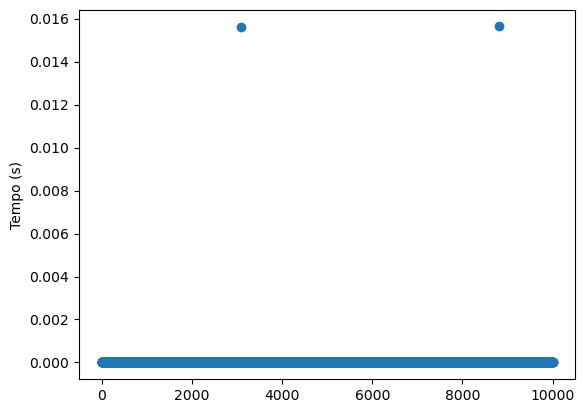

In [151]:
listaTeste = Lista()

# Cria uma função a partir de outra função e
# parte dos seus parâmetros.
# Para executá-la, basta chamar func(),
# assim como feito pelo benchmark
func = partial(marcaTempo(listaTeste.insereValor), posicao=0)
benchmark(func)

Muito rápido, exceto por alguns outliers.

Agora tentemos colocar sempre no final da lista.

Como a lista vai crescendo, temos que buscar a última posição cada vez mais distante do início ($O(n)$).

Benchmark levou 9.35E+00s no total, e 9.35E-04±4.09E-03s por iteração


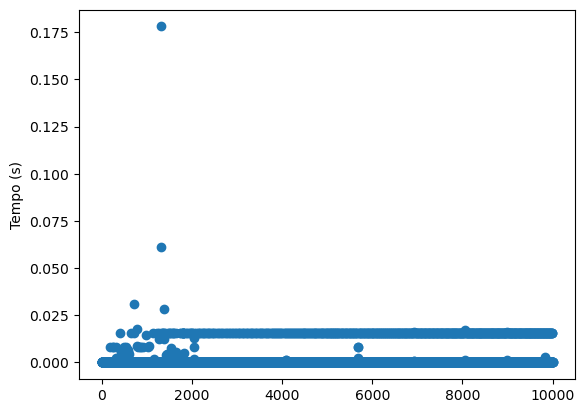

In [152]:
listaTeste = Lista()

# Cria uma função a partir de outra função e
# parte dos seus parâmetros.
# Para executá-la, basta chamar func(),
# assim como feito pelo benchmark
func = partial(marcaTempo(listaTeste.insereValor), posicao=-1)
benchmark(func)

Pelos resultados (olhe as diferentes escalas e ignore os outliers), adicionar sempre no final da lista foi bem mais lento.

Gráficamente, também vemos que o tempo levado por iteração é menos regular.

Uma das possíveis melhorias para permitir inserção mais rápida também na última posição, é modificando a implementação da nossa lista.

In [153]:
class ListaComElementoFinal():
    def __init__(self):
        # Cria uma lista vazia
        self.primeiroElementoLista = None
        self.ultimoElementoLista = None

    def buscaElementoPosicao(self, posicao):
        # Procure o elemento atualmente na posicao
        elementoPosicao = self.primeiroElementoLista
        posicaoBuscada = 0
        while posicaoBuscada != posicao:
            if elementoPosicao is None:
                raise Exception(f"Posição não existente na lista: {posicao}")
            if elementoPosicao.proximo is None and posicao == -1:
                return elementoPosicao
            if elementoPosicao.proximo.proximo is None and posicao == -2:
                return elementoPosicao
            elementoPosicao = elementoPosicao.proximo
            posicaoBuscada += 1
        return elementoPosicao

    def insereValor(self, valor, posicao=0):
        # Cria um elemento para a lista
        novoElementoLista = ElementoLista(valorInicial=valor)

        if posicao == -1 and self.primeiroElementoLista is None:
                self.primeiroElementoLista = novoElementoLista
                self.ultimoElementoLista = novoElementoLista
                return None

        # E a posição de inserção seja a primeira posição
        if posicao == 0:
            if self.primeiroElementoLista is not None:
                novoElementoLista.proximo = self.primeiroElementoLista
            else:
                self.ultimoElementoLista = novoElementoLista
            self.primeiroElementoLista = novoElementoLista
        elif posicao == -1:
            # Muda referência para próximo elemento colocado ao final da lista
            self.ultimoElementoLista.proximo = novoElementoLista
            # Atualiza novo ultimo elemento
            self.ultimoElementoLista = novoElementoLista
        # Se a lista não estiver vazia
        else:
            # Busca elemento anterior a posicao
            elementoPosicao = self.buscaElementoPosicao(posicao-1)
            # Salva a referência para o elemento na
            # posição como próximo do novo elemento
            novoElementoLista.proximo = elementoPosicao.proximo
            # Substitui elemento na posição pelo novo elemento
            elementoPosicao.proximo = novoElementoLista
        return None

    def removerValor(self, posicao=0):
        if posicao == 0:
            if self.primeiroElementoLista is None:
                return None
            else:
                elementoRemovido = self.primeiroElementoLista
                self.primeiroElementoLista = self.primeiroElementoLista.proximo
                if self.primeiroElementoLista is None:
                    self.ultimoElementoLista = None
                return elementoRemovido.valor
        else:
            if posicao == -1 and self.primeiroElementoLista == self.ultimoElementoLista:
                elementoRemovido = self.primeiroElementoLista
                self.primeiroElementoLista = None
                self.ultimoElementoLista = None
                return elementoRemovido
            elementoPosicao = self.buscaElementoPosicao(posicao-1)
            if elementoPosicao.proximo is not None:
                elementoRemovido = elementoPosicao.proximo
                elementoPosicao.proximo = elementoRemovido.proximo
                if self.ultimoElementoLista == elementoRemovido:
                    self.ultimoElementoLista = elementoPosicao
                return elementoRemovido.valor
            return None

Agora o desempenho deve ser similar inserindo elementos em ambos os lados

Benchmark levou 3.09E-02s no total, e 3.09E-06±2.19E-04s por iteração


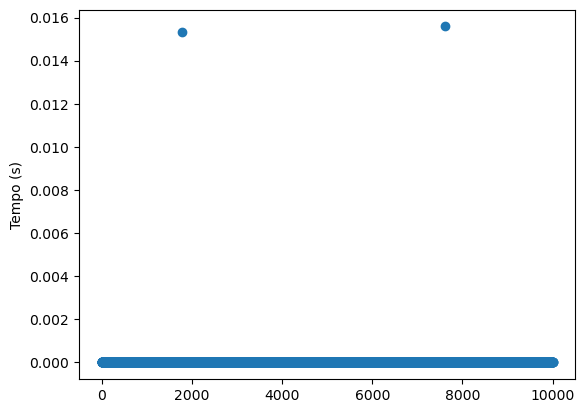

In [154]:
listaTeste = ListaComElementoFinal()
func = partial(marcaTempo(listaTeste.insereValor), posicao=-1)
benchmark(func)

E agora para tirar estes elementos? Como será o comportamento

Benchmark levou 1.56E-02s no total, e 1.56E-06±1.56E-04s por iteração


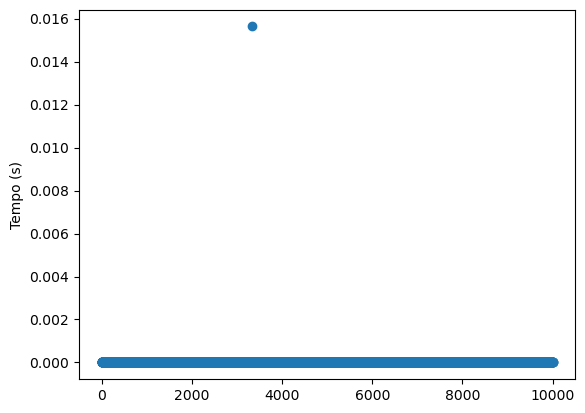

In [155]:
def benchmarkRemocao(func, itens=10000, pulaImpressao=False):
    tempos = []
    for i in range(itens):
        resultado, tempo = func()
        tempos.append(tempo)
    if not pulaImpressao:
        print(f"Benchmark levou {sum(tempos):.2E}s no total, e {statistics.mean(tempos):.2E}±{statistics.stdev(tempos):.2E}s por iteração")
        plt.scatter(list(range(itens)), tempos)
        plt.ylabel("Tempo (s)")
        plt.show()

func = partial(marcaTempo(listaTeste.removerValor), posicao=0)
benchmarkRemocao(func)

Também bastante rápido removendo do começo da lista.

O problema vem na hora de remover elementos do final.

Não tem escapatória, já que mesmo com a referência para o último elemento, não podêmos removê-lo e atualizar o elemento anterior a ele para ser o novo último elemento.

Benchmark levou 1.43E+01s no total, e 1.43E-03±4.51E-03s por iteração


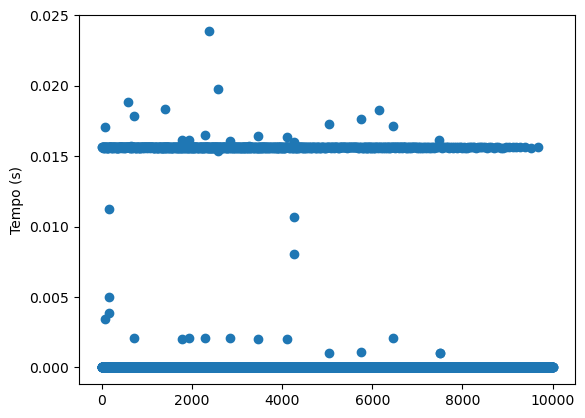

In [156]:
func = partial(marcaTempo(listaTeste.insereValor), posicao=-1)
benchmark(func, pulaImpressao=True)
func = partial(marcaTempo(listaTeste.removerValor), posicao=-1)
benchmarkRemocao(func)

Extremamente lento. Mas há uma solução.

Uma estrutura de dados diferente, agora duplamente encadeada.

## Deque

O deque corrige este problema da lista, colocando referências também para os elementos anteriores, e não somente para os elementos posteriores.

Isto permite remoção rápida dos elementos em ambas as extremidades.

In [157]:
class ElementoDeque():
    def __init__(self, valorInicial):
        # Cria um elemento de deque
        # contendo o valor enfileirado
        self.valor = valorInicial
        # e a referência para o elemento posterior a ele no deque
        self.proximo = None
        # e a referência para o elemento anterior a ele no deque
        self.anterior = None

class Deque():
    def __init__(self):
        # Cria um deque vazia
        self.primeiroElementoDeque = None

    def buscaElementoPosicao(self, posicao):
        # Procure o elemento atualmente na posicao
        elementoPosicao = self.primeiroElementoDeque
        posicaoBuscada = posicao
        while posicaoBuscada > 0:
            if elementoPosicao is None:
                raise Exception(f"Posição não existente no deque: {posicao}")
            elementoPosicao = elementoPosicao.proximo
            posicaoBuscada -= 1
        return elementoPosicao

    def insereNovoElemento(self, novoElemento, elementoPosicao):
        # Salva a referência para o elemento na
        # posição como próximo do novo elemento
        #
        #            novoElemento
        #         anterior  proximo
        #                   |
        #                   v
        # | posicao-1 |  posicao  | posicao+1
        # | proximo-> | proximo-> | proximo->
        # | <-anterior|<-anterior |<-anterior
        novoElemento.proximo = elementoPosicao

        # Salva a referência para o elemento anterior
        # ao da posição como anterior do novo elemento
        #
        #            novoElemento
        #         anterior  proximo
        #           |       |
        #           v       v
        # | posicao-1 |  posicao  | posicao+1
        # | proximo-> | proximo-> | proximo->
        # | <-anterior|<-anterior |<-anterior
        novoElemento.anterior = elementoPosicao.anterior

        # Atualiza referencia do elemento posterior do elemento
        # anterior para o novo elemento
        #
        #            novoElemento
        #     anterior  ^    proximo
        #           |   |    |
        #           v   |    v
        # | posicao-1   |    posicao    | posicao+1
        # | proximo-----^    proximo->  | proximo->
        # | <-anterior       <-anterior |<-anterior
        # Salva a referência para o elemento anterior ao movido
        if elementoPosicao.anterior is not None:
            elementoPosicao.anterior.proximo = novoElemento

        # Atualiza referencia do elemento anterior do elemento
        # na posição para o novo elemento
        #
        #            novoElemento
        #     anterior  ^ ^  proximo
        #           |   | |   |
        #           v   | |   v
        # | posicao-1   | |   posicao    | posicao+1
        # | proximo-----^ |   proximo->  | proximo->
        # | <-anterior    ^----anterior  |<-anterior
        elementoPosicao.anterior = novoElemento

        if elementoPosicao == self.primeiroElementoDeque:
            self.primeiroElementoDeque = self.primeiroElementoDeque.anterior

    def insereValor(self, valor, posicao=0):
        # Cria um elemento para o deque
        novoElementoDeque = ElementoDeque(valorInicial=valor)

        # E a posição de inserção seja a primeira posição
        if self.primeiroElementoDeque is None:
            self.primeiroElementoDeque = novoElementoDeque
        # Se a deque não estiver vazia
        else:
            # Busca elemento anterior a posicao
            #                  v
            # | posicao-1 |  posicao  | posicao+1
            # | proximo-> | proximo-> | proximo->
            #
            elementoPosicao = self.buscaElementoPosicao(posicao) if posicao > 0 else self.primeiroElementoDeque

            # Reorganizando
            #                novoElemento
            #                    v
            # | posicao-1  | posicao    | posicao+1 | posicao+2
            # | proximo->  | proximo->  | proximo-> | proximo->
            # | <-anterior | <-anterior |<-anterior |<-anterior
            self.insereNovoElemento(novoElementoDeque, elementoPosicao)

    def removerValor(self, posicao=0):
        if self.primeiroElementoDeque is None:
            return None
        else:
            elementoPosicao = self.buscaElementoPosicao(posicao-1) if posicao > 0 else self.primeiroElementoDeque
            valor = elementoPosicao.valor
            if elementoPosicao.proximo is not None:
                elementoPosicao.proximo.anterior = None
            if elementoPosicao == self.primeiroElementoDeque:
                self.primeiroElementoDeque = self.primeiroElementoDeque.proximo
            return valor